#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [25]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [26]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [35]:
# task 1
import pandas as pd
from tqdm.auto import tqdm

file_path = 'Salaries.csv'
df = pd.read_csv(file_path, encoding='ascii')

num_rows = df.shape[0]
num_columns = df.shape[1]
column_data_types = df.dtypes
missing_values = df.isnull().sum()

print('Number of rows:', num_rows)
print('Number of columns:', num_columns)
print('Data types of each column:\n', column_data_types)
print('Missing values in each column:\n', missing_values)

Number of rows: 148654
Number of columns: 13
Data types of each column:
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Missing values in each column:
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [43]:
# task 2
salary_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

statistics = df[salary_columns].describe().T
statistics['range'] = statistics['max'] - statistics['min']
statistics['mode'] = df[salary_columns].mode().iloc[0]
statistics['count'] = statistics['count'].astype(int)
statistics[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range']] = statistics[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range']].round(2)

statistics.head(6)

,count,mean,std,min,25%,50%,75%,max,range,mode
BasePay,148045,66325.45,42764.64,-166.01,33588.20,65007.45,94691.05,319275.01,319441.02,0.00
OvertimePay,148650,5066.06,11454.38,-0.01,0.00,0.00,4658.18,245131.88,245131.89,0.00
OtherPay,148650,3648.77,8056.60,-7058.59,0.00,811.27,4236.07,400184.25,407242.84,0.00
Benefits,112491,25007.89,15402.22,-33.89,11535.40,28628.62,35566.85,96570.66,96604.55,0.00
TotalPay,148654,74768.32,50517.01,-618.13,36169.00,71426.61,105839.14,567595.43,568213.56,0.00
TotalPayBenefits,148654,93692.55,62793.53,-618.13,44065.65,92404.09,132876.45,567595.43,568213.56,7959.18


In [61]:
#task 3
import numpy as np

# Since 'Notes' and 'Status' columns are completely missing, we will drop them
# For 'Benefits', since it's a significant part of compensation, we'll impute missing values with the median
# For 'BasePay', 'OvertimePay', and 'OtherPay' with few missing values, we'll impute with the median

df_cleaned = df.drop(columns=['Notes', 'Status'])

for column in ['Benefits', 'BasePay', 'OvertimePay', 'OtherPay']:
    median_value = df_cleaned[column].median()
    df_cleaned[column] = df_cleaned[column].fillna(median_value)

missing_values_after_cleaning = df_cleaned.isnull().sum()

print(df_cleaned.head())
print('Missing values after cleaning:\n', missing_values_after_cleaning)
# no missing values left



   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25  28628.62  567595.43         567595.43   
1  155966.02    245131.88  137811.38  28628.62  538909.28         538909.28   
2  212739.13    106088.18   16452.60  28628.62  335279.91         335279.91   
3   77916.00     56120.71  198306.90  28628.62  332343.61         332343.61   
4  134401.60      9737.00  182234.59  28628.62  326373.19         326373.19   

   Year         Agency  
0  2011  San Francisco  
1  2011  San Franc

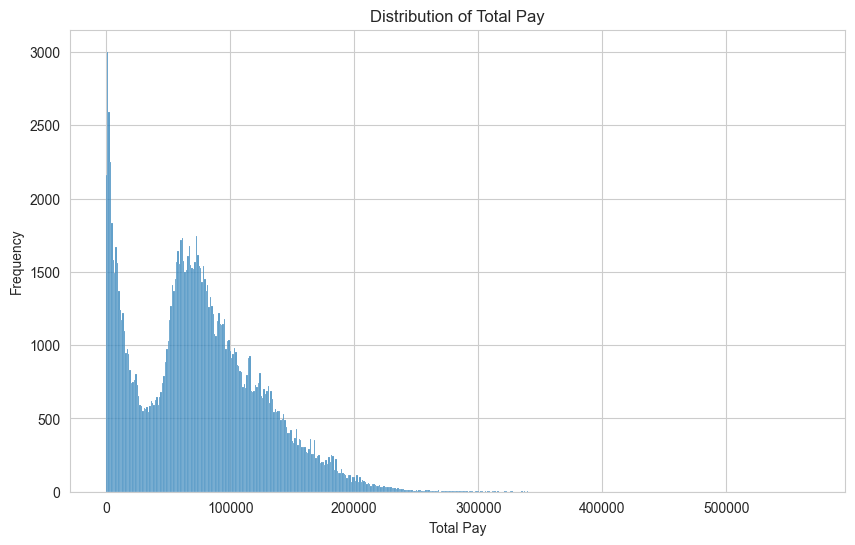

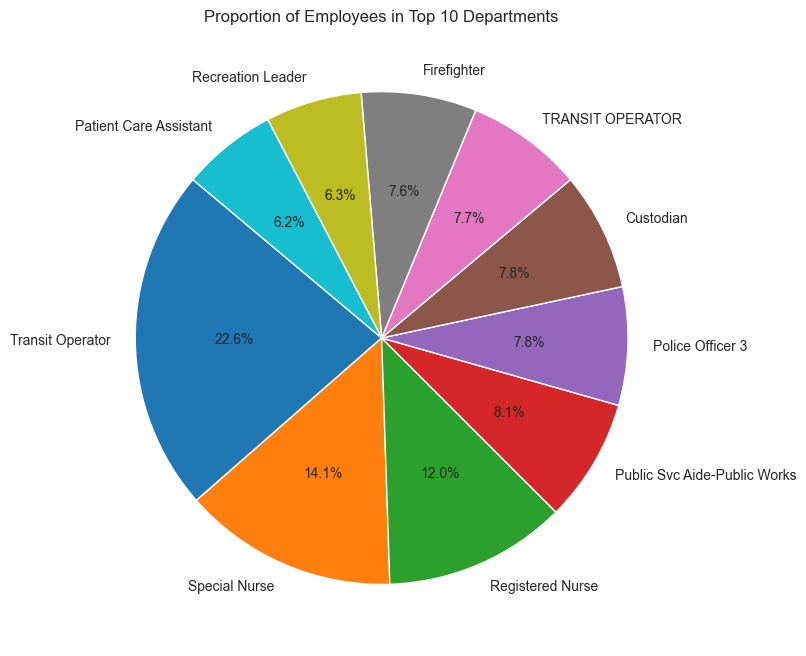

In [89]:
# task 4
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Histogram for 'TotalPay'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['TotalPay'], bins=500, kde=False)
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# Pie chart for the top 10 proportion of employees in different departments (JobTitle)
top_departments = df_cleaned['JobTitle'].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(top_departments, labels=top_departments.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Top 10 Departments')
plt.show()

In [94]:
# task 5
# Group the data by 'Year' and 'JobTitle' and calculate summary statistics for each group
# We will focus on 'TotalPay' for the salary analysis
grouped_data = df_cleaned.groupby(['Year', 'JobTitle'])['TotalPay'].describe()

print(grouped_data.head(20))

                                                         count           mean  \
Year JobTitle                                                                   
2011 ACCOUNT CLERK                                        83.0   44035.664337   
     ACCOUNTANT                                            5.0   47429.268000   
     ACCOUNTANT INTERN                                    48.0   29031.742917   
     ACUPUNCTURIST                                         1.0   67594.400000   
     ADMINISTRATIVE ANALYST                               93.0   63954.867527   
     ADMINISTRATIVE ANALYST II                             2.0   61497.035000   
     ADMINISTRATIVE ANALYST III                            2.0   92698.515000   
     ADMINISTRATIVE ENGINEER                              10.0  127961.430000   
     ADMINISTRATIVE SERVICES MANAGER                       3.0   77015.580000   
     ADMINISTRATOR, SFGH MEDICAL CENTER                    1.0  257124.440000   
     AFFIRMATIVE ACTION SPEC

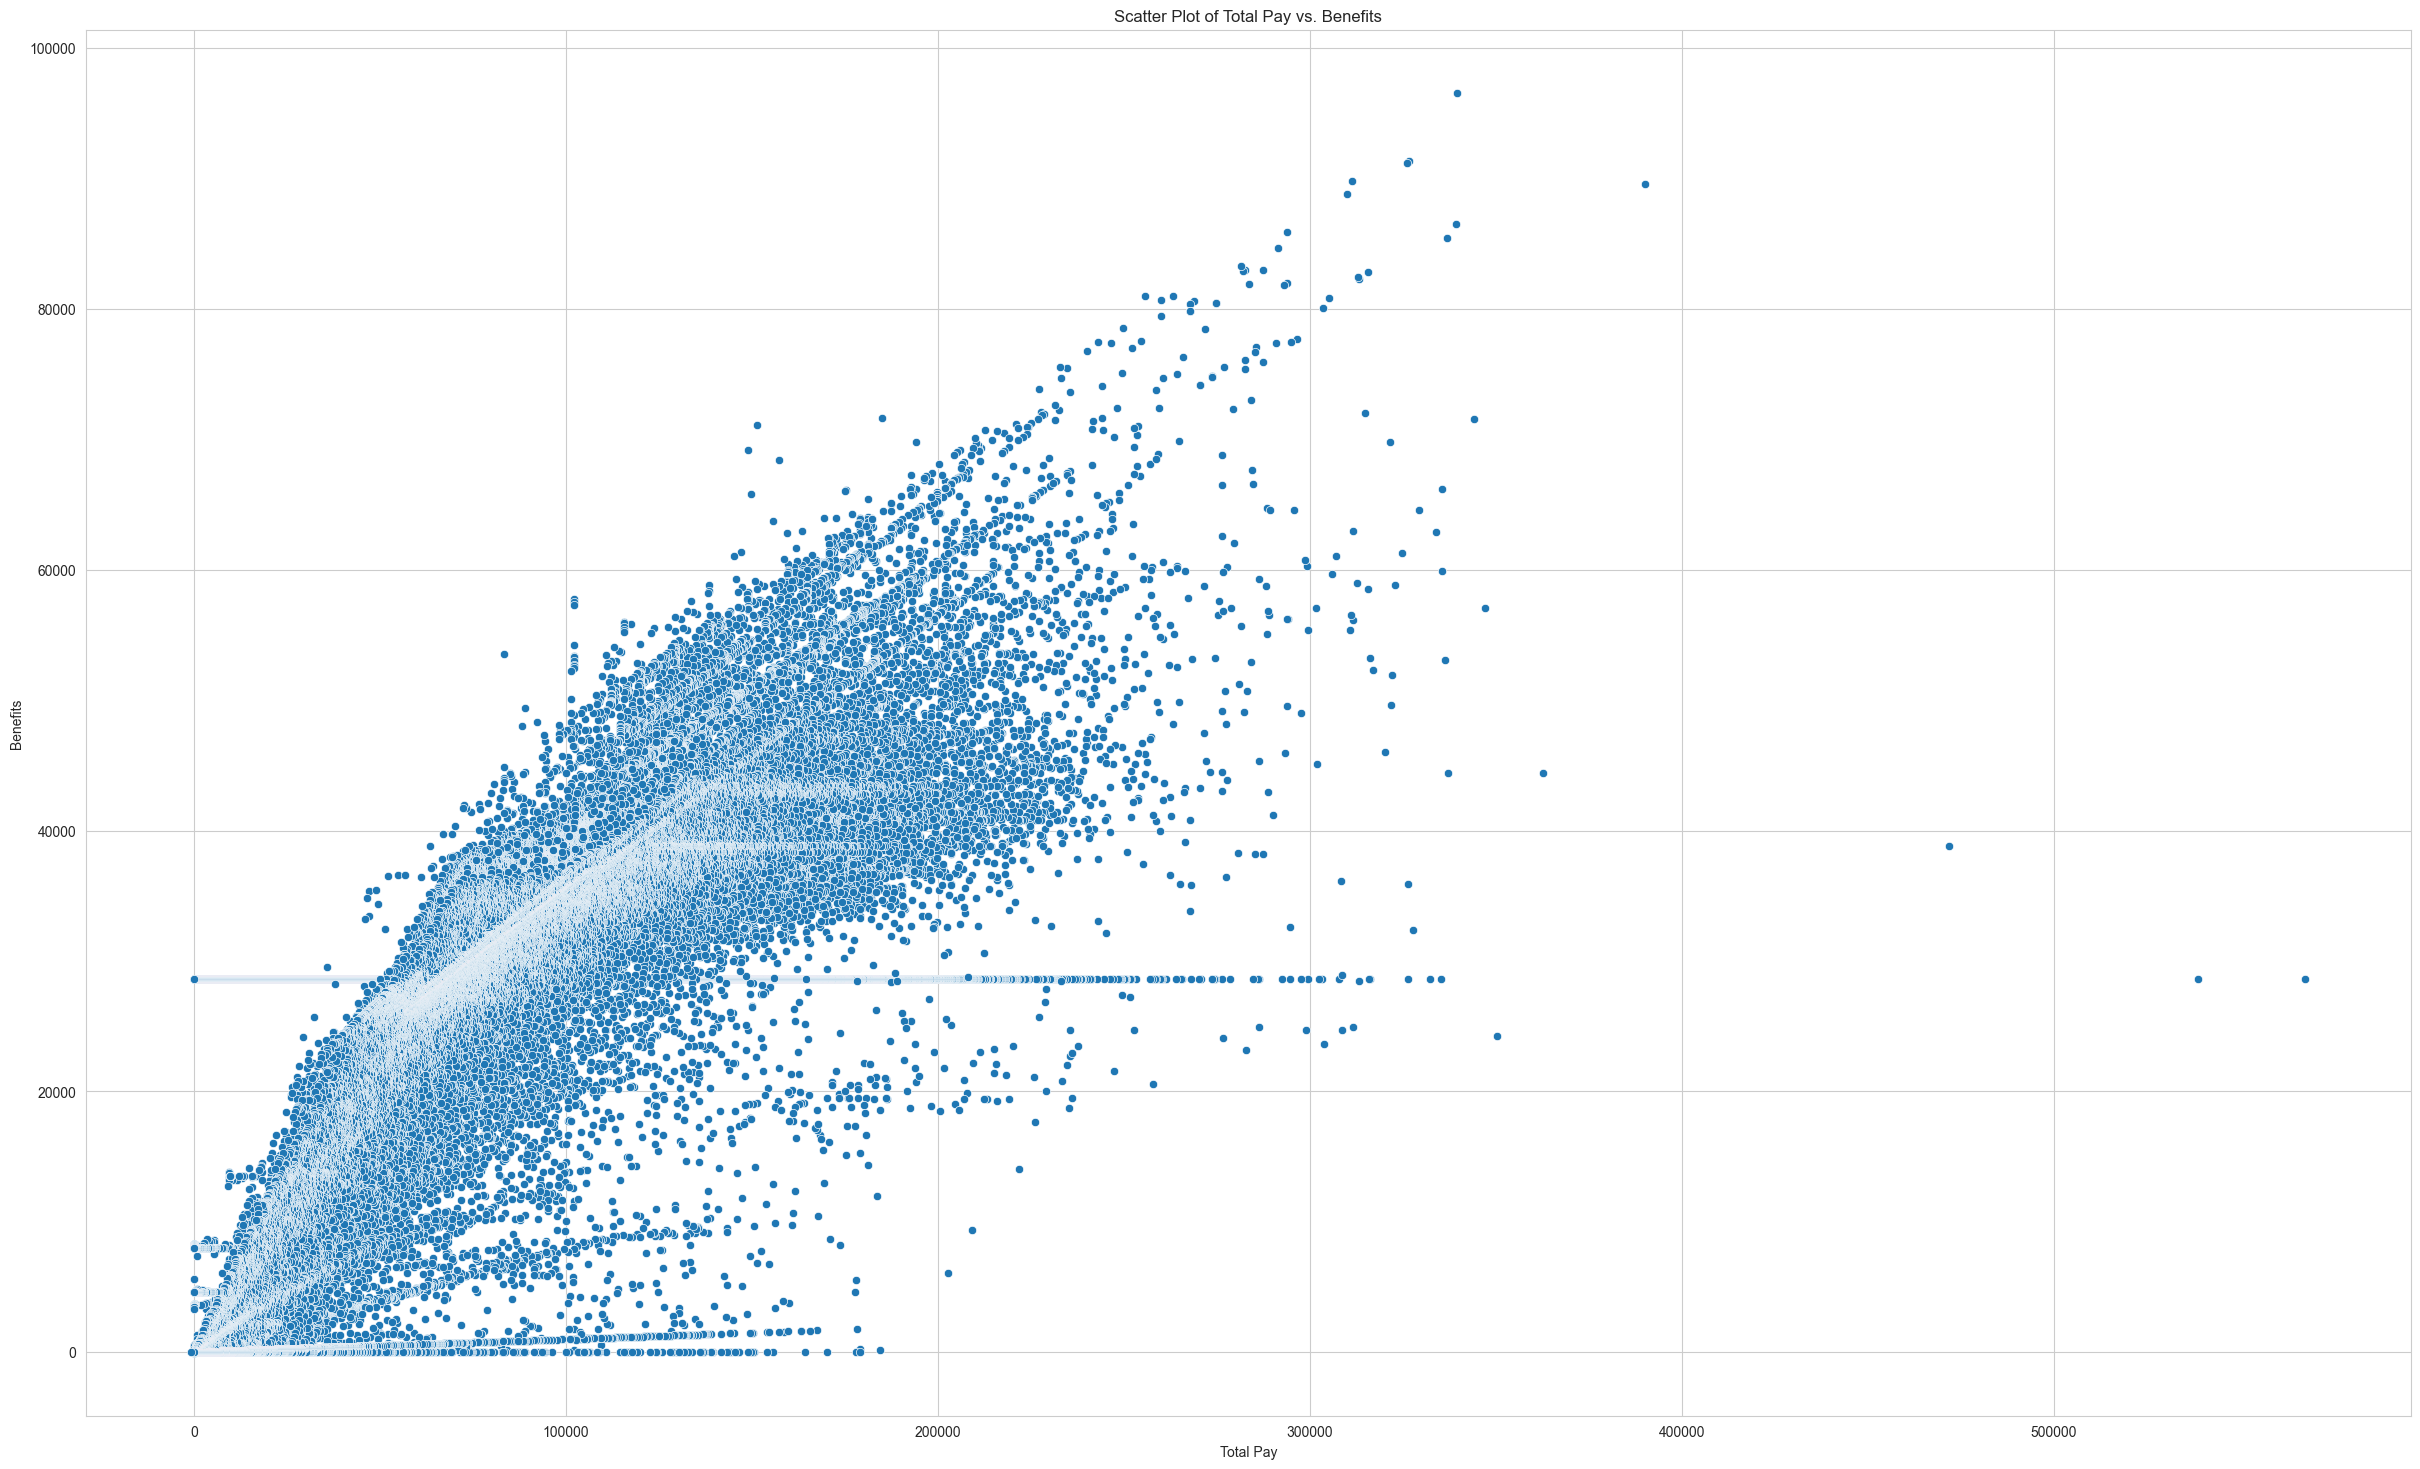

          TotalPay  Benefits
TotalPay  1.000000  0.773559
Benefits  0.773559  1.000000


In [96]:
# task 6
correlation = df_cleaned[['TotalPay', 'Benefits']].corr()

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(30, 18))
sns.scatterplot(data=df_cleaned, x='TotalPay', y='Benefits')
plt.title('Scatter Plot of Total Pay vs. Benefits')
plt.xlabel('Total Pay')
plt.ylabel('Benefits')
plt.show()

print(correlation)

<h1>task 7</h1>
Data Cleaning and Preprocessing:
Missing values in 'Notes' and 'Status' columns were addressed by removing these columns due to complete absence of data.
Missing values in 'Benefits', 'BasePay', 'OvertimePay', and 'OtherPay' were imputed with median values to maintain the integrity of the dataset.

Salary Distribution:
A histogram of 'TotalPay' revealed the distribution of total compensation across the dataset, indicating a wide range of salaries with a concentration in the lower to mid salary range.

Departmental Distribution:
A pie chart of the top 10 departments by number of employees showed a diverse workforce spread across various departments, with some departments having a larger proportion of employees.
Grouped Analysis:
Grouping the data by 'Year' and 'JobTitle' and calculating summary statistics for 'TotalPay' provided insights into the changes in pay scales over time and across different job titles.

Correlation Analysis:
A scatter plot and correlation coefficient of approximately 0.774 between 'TotalPay' and 'Benefits' suggested a strong positive relationship, indicating that benefits tend to increase as total pay increases.

Insights:
The data suggests a positive correlation between pay and benefits, which is expected in a structured pay scale system.
The grouped analysis by year and job title could be useful for identifying trends in compensation over time and for benchmarking salaries for specific positions.